<h1 align='center'> 신호 및 시스템 실습 11</h1>

<p style="text-align: right"> 2021.5.27. (목)</p>

<div class="alert alert-block alert-info">
    
- 파일 이름에서 00000000을 자신의 학번으로, name을 자신의 이름으로 수정하세요.

- 다음 줄에 자신의 이름, 학번, 학과(전공)을 적으세요.

* 이름: 장윤제  &nbsp;&nbsp;          학번: 20175334   &nbsp;&nbsp;         학과(전공): 스마트IoT
    
</div>

- Jupyter notebook에 대한 설명은 [The Jupyter Notebook](https://jupyter-notebook.readthedocs.io/en/stable/)을  참고하라.

- Markdown은 [Markdown Guide](https://www.markdownguide.org/)를 참고하라.
- [Markdown Cheat Sheet](https://www.markdownguide.org/cheat-sheet/)
- Sympy의 복소수 관련 함수는 [sympy.functions.elementary.complexes](https://docs.sympy.org/latest/modules/functions/elementary.html#cbrt)를 참고하라.

* 제출 마감: 5월 29일 (토) 오후 6:00까지 최종본 제출


In [1]:
from skimage import data, io, filters
import scipy.signal as sig
from scipy.signal import convolve2d
import numpy as np
import matplotlib.pyplot as plt
#dir(data)

In [2]:
camera = data.camera()
edge_roberts = filters.roberts(camera)
edge_sobel = filters.sobel(camera)
print(edge_roberts.dtype, edge_roberts.max(), edge_roberts.min())

float64 0.47084960062129044 0.0


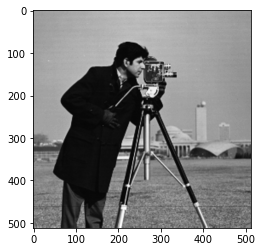

In [3]:
plt.imshow(camera, cmap='gray')
plt.show()

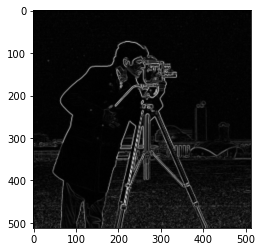

In [4]:
plt.imshow(edge_roberts, cmap='gray')
plt.show()

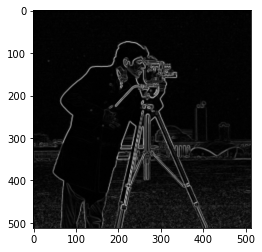

In [5]:
plt.imshow(edge_sobel, cmap='gray')
plt.show()

In [6]:
h_line = np.array([[-1,-1,-1],[2,2,2],[-1,-1,-1]])
h_camera = sig.convolve2d(camera, h_line, mode='same')

In [7]:
h_camera.min(), h_camera.max(), h_camera.dtype

(-295, 753, dtype('int32'))

In [8]:
h_camera = (h_camera - h_camera.min()) / (h_camera.max() - h_camera.min())
h_camera.min(), h_camera.max(), h_camera.dtype

(0.0, 1.0, dtype('float64'))

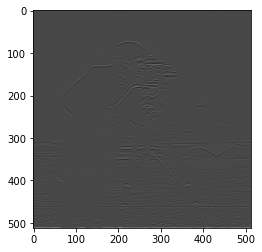

In [9]:
plt.imshow(h_camera, cmap='gray')
plt.show()

In [10]:
h_camera.mean()

0.28305113770579565

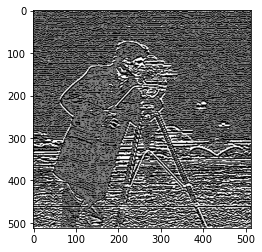

In [11]:
hh = h_camera.copy()
hh[hh>h_camera.mean()] = 1.
hh[hh<=h_camera.mean()] = 0
plt.imshow(hh, cmap='gray')
plt.show()

In [12]:
hh[:10,:10]

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 1., 1., 1., 1., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 0.]])

In [13]:
d45_line = np.array([[-1,-1,2],[-1,2,-1],[2,-1,-1]])
d45_camera = sig.convolve2d(camera, d45_line, mode='same')

In [14]:
d45_camera.min(), d45_camera.max(), d45_camera.dtype

(-399, 368, dtype('int32'))

In [15]:
d45_camera = (d45_camera - d45_camera.min()) / (d45_camera.max() - d45_camera.min())
d45_camera.min(), d45_camera.max(), d45_camera.dtype

(0.0, 1.0, dtype('float64'))

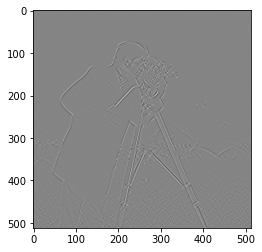

In [16]:
plt.imshow(d45_camera, cmap='gray')
plt.show()

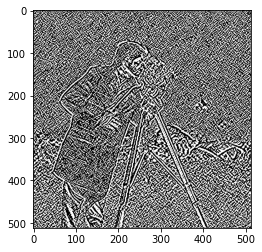

In [17]:
d45 = d45_camera.copy()
d45[d45>d45_camera.mean()] = 1.
d45[d45<=d45_camera.mean()] = 0
plt.imshow(d45, cmap='gray')
plt.show()

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio


def single_tone(duration, A, f, phi, fs=44100):
    t = np.arange(0, duration, 1/fs)
    return t, A * np.sin(2 * np.pi * f * t + phi)


def get_fade_window_2(duration=1, t_in=0.02, t_out=0.02, fs=44100):

    if t_in + t_out > duration:
        t_out = duration - t_in    
    Ts = 1 / fs
    t = np.arange(0, duration, Ts)
    fade_window = []
    for t_ in t:
        if t_ < t_in :
            fade_window.append(t_/t_in)
        elif t_ < (duration - t_out):
            fade_window.append(1.0)
        else:
            fade_window.append((duration-t_)/t_out)
    
    return t, np.array(fade_window)

def score_to_wave(score, key_no, tempo=100, fs=44100):
    wav = np.array([])
    for note in score:
        key = note[0]
        no = key_no[key]
        length = note[1] * 60 / tempo
        if no < 1:
            f = 0.
        else:
            f = 440.0 * (2 ** ((no-49)/12))
        t, tone = single_tone(length, 0.8, f, 0, fs)
        t, win = get_fade_window_2(length, 0.02, 0.02, fs)
        wav = np.append(wav, tone*win)
    return wav


key_no = {'R':0, 'C4': 40, 'D4':42, 'E4':44, 'F4':45, 
           'G4':47, 'A4': 49, 'B4': 51, 'C5':52,
          'D5':54, 'E5':56, 'F5':57, 
           'G5':59, 'A5': 61, 'B5': 63, 'C6':64}

In [19]:
fs = 8000
C_scale = (('C4', 1), ('D4', 1), ('E4', 1), ('F4', 1), 
             ('G4', 1), ('A4', 1), ('B4', 1), ('C5', 1),
             ('D5', 1), ('E5', 1), ('F5', 1), 
             ('G5', 1), ('A5', 1), ('B5', 1), ('C6', 1))

school_bell_sop_note = [('G4', 1), ('G4', 1), ('A4', 1), ('A4', 1), ('G4', 1), ('G4', 1), ('E4', 2),
                        ('G4', 1), ('G4', 1), ('E4', 1), ('E4', 1), ('D4', 3), ('R', 1),
                       ('G4', 1), ('G4', 1), ('A4', 1), ('A4', 1), ('G4', 1), ('G4', 1), ('E4', 2),
                       ('G4', 1), ('E4', 1), ('D4', 1), ('E4', 1), ('C4', 3), ('R', 1)]
C_scale_wav = score_to_wave(C_scale, key_no, tempo=100, fs=fs)

    
    

In [20]:
no =64 
440.0 * (2 ** ((no-49)/12))

1046.5022612023945

In [21]:
from IPython.display import Audio
Audio(C_scale_wav, rate=fs)


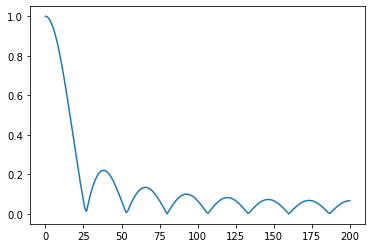

In [22]:
h15 = np.full(15, 1/15)
H15 = np.fft.rfft(h15, 400)
plt.plot(np.abs(H15))
plt.show()

In [23]:
y = np.convolve(h15, C_scale_wav)
y = np.convolve(h15, y)
y = np.convolve(h15, y)

Audio(y, rate=fs)

In [24]:
h = sig.firwin(31, 0.05)
yn = np.convolve(h, C_scale_wav)
Audio(yn, rate=fs)

#### Comvolution sum 이해하기

In [25]:
x = np.array([2, 1, 5, 4, 2])
h = np.array([2, 3, 1, 2])
np.convolve(h, x)

array([ 4,  8, 15, 28, 23, 20, 10,  4])

$$h[n] = [2, 3, 1, 2]$$
$$x[n] = [2, 1, 5, 4, 2]$$
\begin{align*}
y[n] &= \sum_{k=0}^3 h[k] x[n-k] \\
&= h[0] x[n] + h[1] x[n-1] + h[2]x[n-2] + h[3]x[n-3]
\end{align*}

|$$n$$ | 0 | 1 | 2| 3| 4| 5| 6| 7 | 8 |
--|--|--|--|--|--|--|--|--|--
$$h[n]$$ | 2 | 3 | 1 | 2 | | || 
$$x[n]$$ | 2 | 1| 5| 4| 2| | || 
$$h[0]x[n]$$ | (2)2 | (2)1| (2)5| (2)4| (2)2| || | 
$$h[1]x[n-1]$$ || (3)2 | (3)1| (3)5| (3)4| (3)2| | |
$$h[2]x[n-2]$$ ||| 2 | 1| 5| 4| 2| |
$$h[3]x[n-3]$$ |||| (2)2 | (2)1| (2)5| (2)4|(2) 2 |
$$y[n]$$ | 4 |8|15| 28| 23| 20| 10|4|  

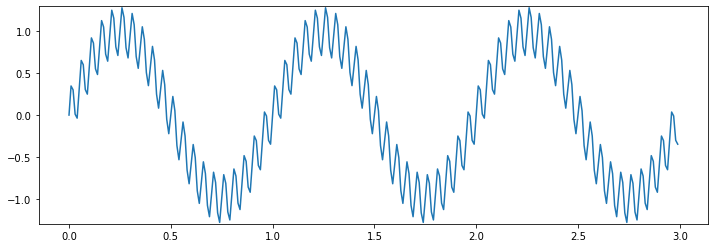

In [26]:
fs = 100
f0 = 1
fn = 20
t = np.arange(0, 3, 1/fs)
x = np.sin(2*np.pi*f0*t)
e = 0.3*np.sin(2*np.pi*fn*t)
xe = x + e
plt.figure(figsize=(12,4))
plt.plot(t, xe)
plt.ylim(-1.3, 1.3)
plt.show()

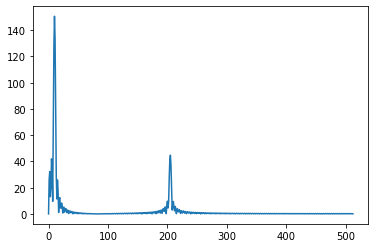

In [27]:
XE = np.fft.rfft(xe, 1024)
plt.plot(np.abs(XE))
plt.show()

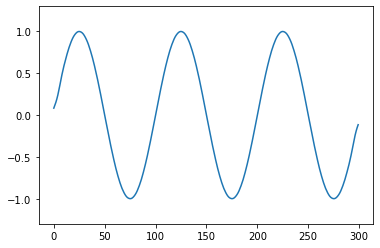

In [28]:
h1 = sig.firwin2(31, [0, 0.2, 0.25, 1.0], [1, 1, 0, 0])
y1 = np.convolve(h1, xe, mode='same')
plt.plot(y1)
plt.ylim(-1.3, 1.3)
plt.show()

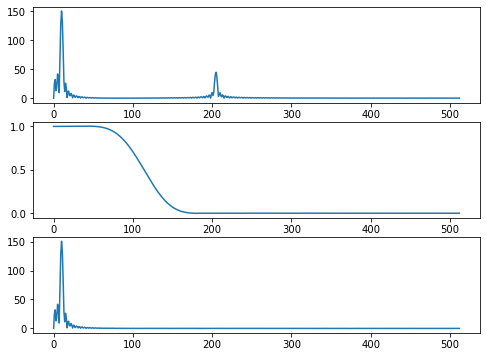

In [29]:
Y1 = np.fft.rfft(y1, 1024)
H1 = np.fft.rfft(h1, 1024)
plt.figure(figsize=(8, 6))
plt.subplot(311)
plt.plot(np.abs(XE))
plt.subplot(312)
plt.plot(np.abs(H1))
plt.subplot(313)
plt.plot(np.abs(Y1))
plt.show()

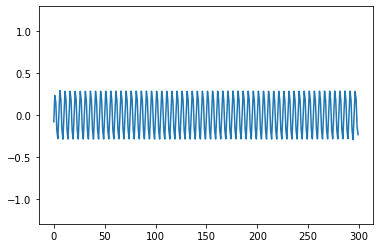

In [30]:
h2 = sig.firwin(31, 0.2, pass_zero=False)
y2 = np.convolve(h2, xe, mode='same')
plt.plot(y2)
plt.ylim(-1.3, 1.3)
plt.show()

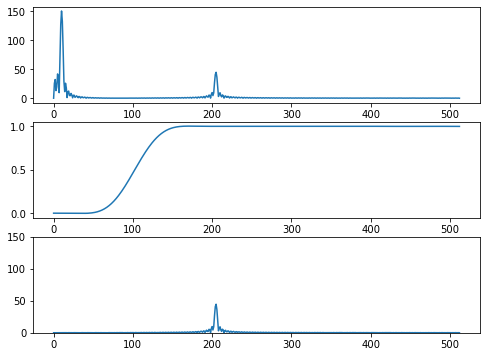

In [31]:
Y2= np.fft.rfft(y2, 1024)
H2= np.fft.rfft(h2, 1024)
plt.figure(figsize=(8, 6))
plt.subplot(311)
plt.plot(np.abs(XE))
plt.subplot(312)
plt.plot(np.abs(H2))
plt.subplot(313)
plt.plot(np.abs(Y2))
plt.ylim(0, 150)
plt.show()

#### 문제 1: 

다음 두 신호의 convolution sum 연산 과정을 2 가지 방법으로 계산하라. (종이에 손으로 계산한 것을 별도 제출)

$$x[n] = \{1, 2, 1\} $$
$$h[n] = \{2, 3, 1, 2\} $$

In [1]:
x = np.array([1,2,1])
h = np.array([2,3,1,2])

y1 = np.convolve(h,x)
y2 = np.convolve(x,h)
print(y1)
print(y2)

NameError: name 'np' is not defined

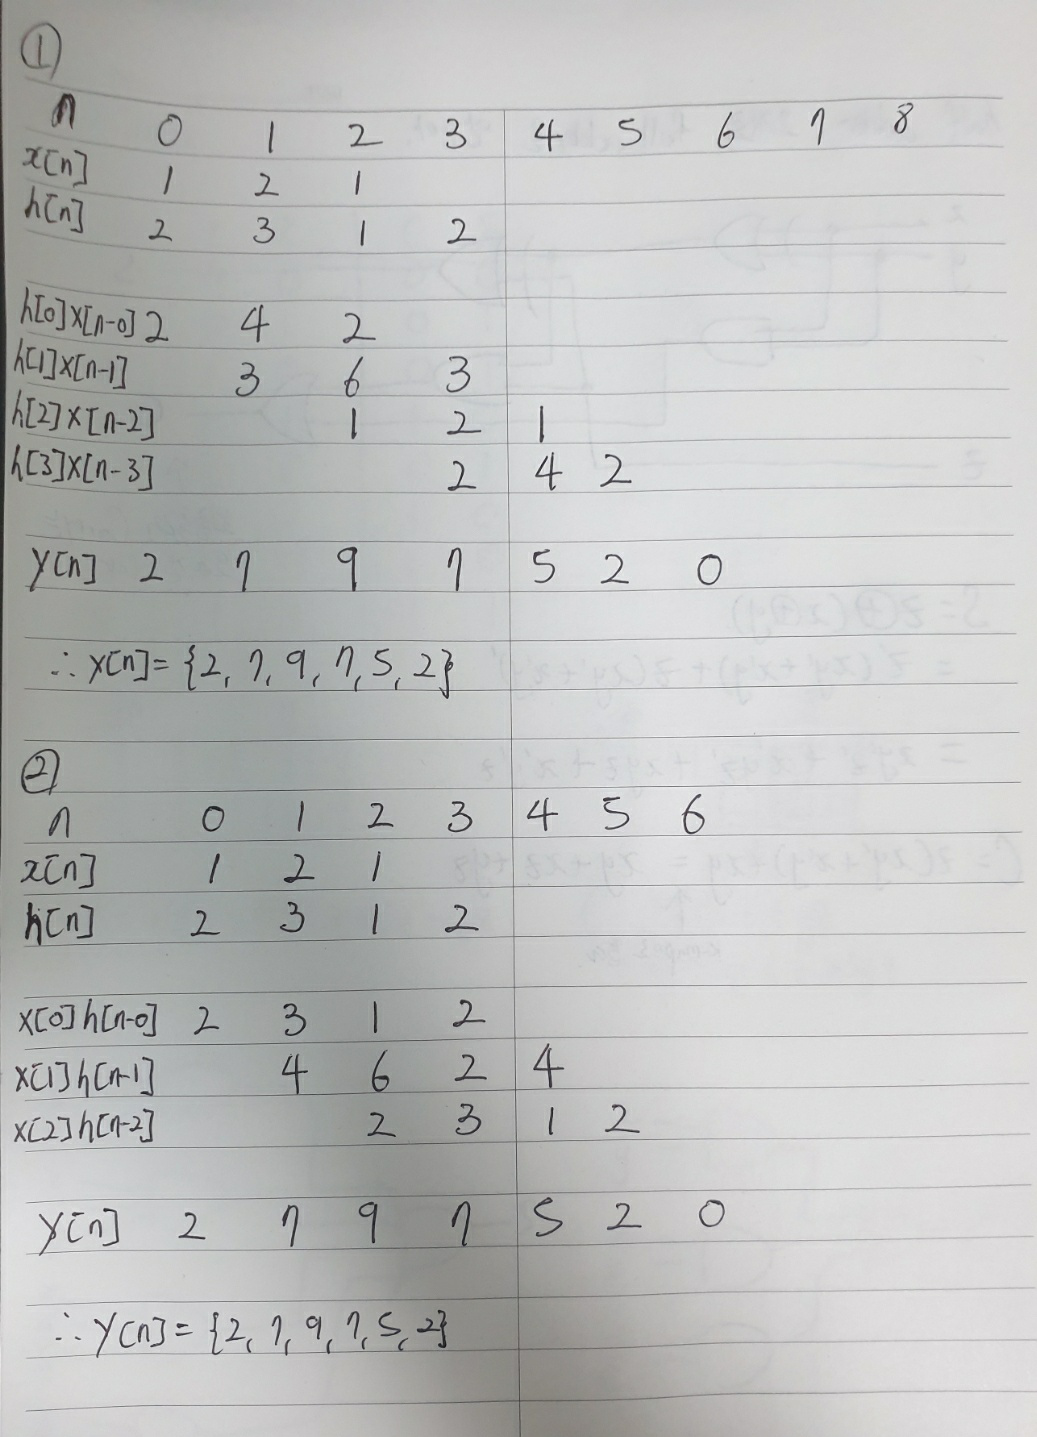

In [6]:
from PIL import Image

Image.open('no1.jpg')


#### 문제 2: 이번 실습을 통해서 새로 알게된 내용을 적어라.

컨볼루션을 사용하여 사진의 사물의 형체를 분리해낼 수 있다.
